In [1]:
import numpy as np
import pandas as pd
from glob import glob
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tqdm import tqdm
import time
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Sequential, model_from_json
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,  EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense ,Input

!pip install tflearn
# 

     |████████████████████████████████| 112kB 3.0MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=c61ac2b4415ef7437cb82ed4a74b87952f7d8a3fa98b0ddc764859faa9207b06
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [2]:
import tflearn.datasets.oxflower17 as df
x,y=df.load_data(one_hot=True)
x.shape

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


(1360, 224, 224, 3)

In [ ]:
y.shape

(1360, 17)

# Lets Display a Image

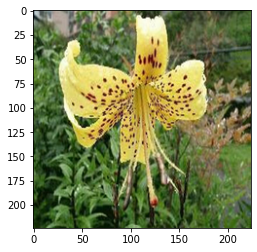

In [3]:
plt.imshow(x[20])

# Loading an Image and checking its shape

In [4]:
import cv2
im=cv2.imread('17flowers/jpg/0/image_0015.jpg')
im.shape

(743, 499, 3)

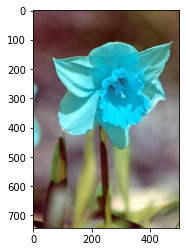

In [5]:
plt.imshow(im)

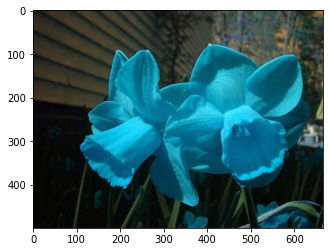

In [7]:
plt.imshow(cv2.imread('17flowers/jpg/0/image_0020.jpg'))

# Now we will display the images vs there labels

In [8]:
y=[]
for i in range(1,18):
    for j in range(80):
        y.append(i)
y[50]

1

In [9]:
y[20]

1

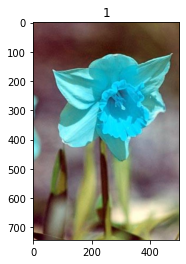

In [11]:
plt.imshow(im)
plt.title(y[15])
plt.show()

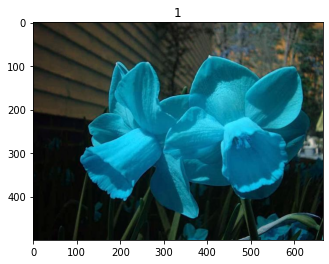

In [12]:
plt.imshow(cv2.imread('17flowers/jpg/0/image_0020.jpg'))
plt.title(y[20])
plt.show()

# Applying different filters to the images

# Lets apply blur filter first

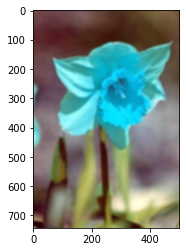

In [13]:
plt.imshow(cv2.blur(im,(10,10)))

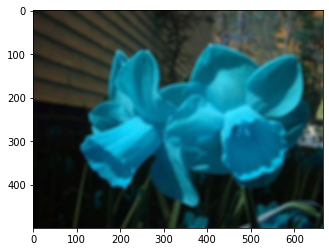

In [14]:
im1=cv2.imread('17flowers/jpg/0/image_0020.jpg')
plt.imshow(cv2.blur(im1,(10,10)))

# Applying canny filter

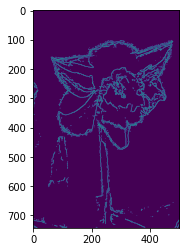

In [15]:
plt.imshow(cv2.Canny(im,100,100))

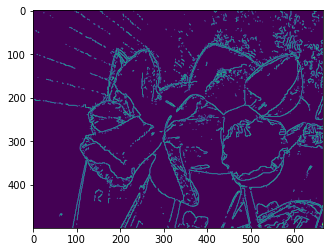

In [16]:
plt.imshow(cv2.Canny(im1,100,100))

# Applying Emboss Filter

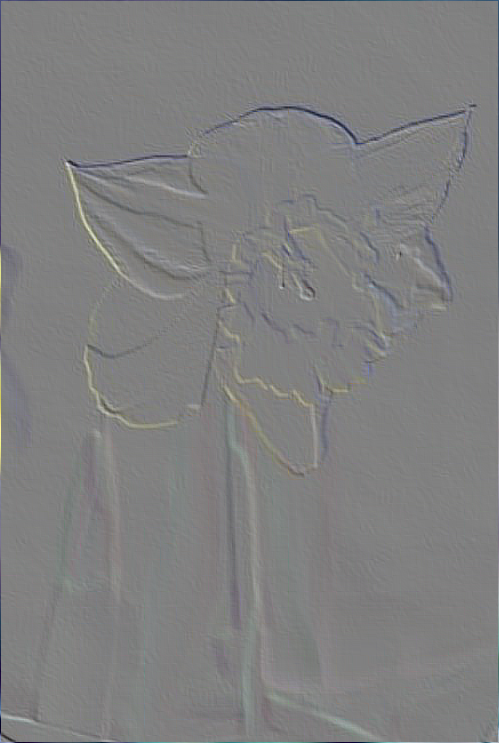

In [17]:
from PIL import ImageFilter,Image
Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.EMBOSS)

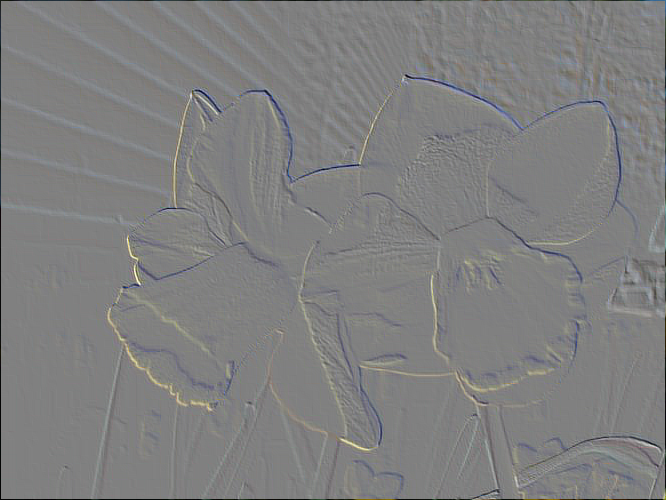

In [18]:
Image.open('17flowers/jpg/0/image_0020.jpg').filter(ImageFilter.EMBOSS)

# Applying Contour filter to the images

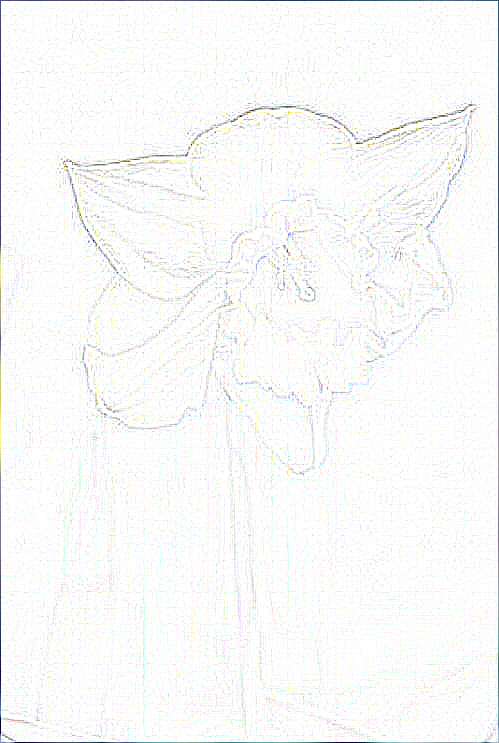

In [19]:
from PIL.ImageFilter import CONTOUR

Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.CONTOUR)

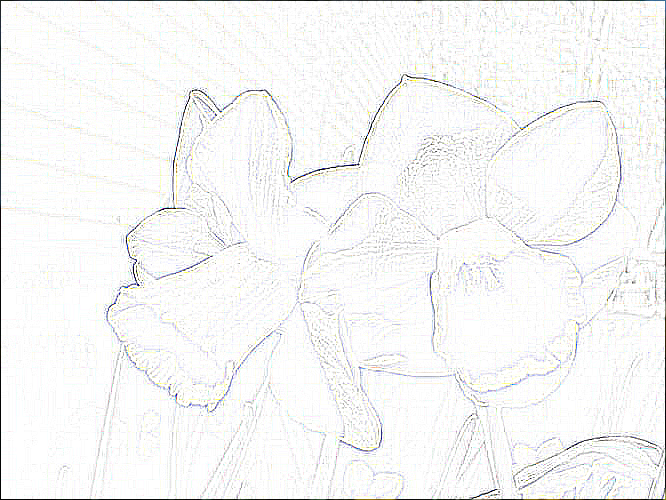

In [20]:
Image.open('17flowers/jpg/0/image_0020.jpg').filter(ImageFilter.CONTOUR)

# Applying EDGE_ENHANCE filter

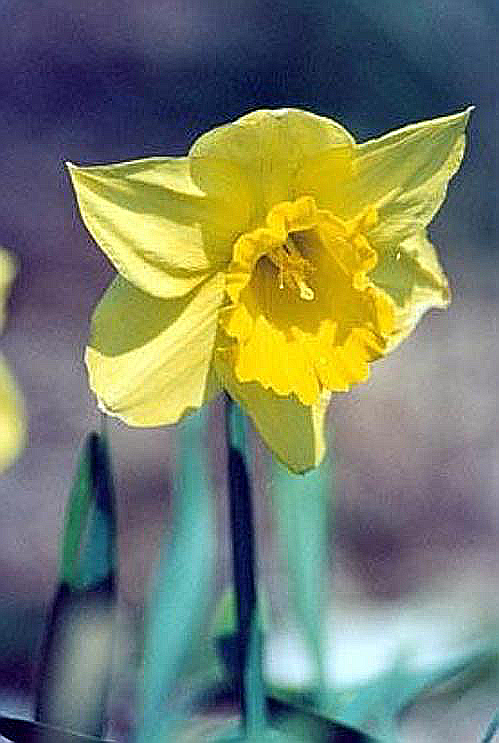

In [22]:
from PIL.ImageFilter import EDGE_ENHANCE

Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.EDGE_ENHANCE)

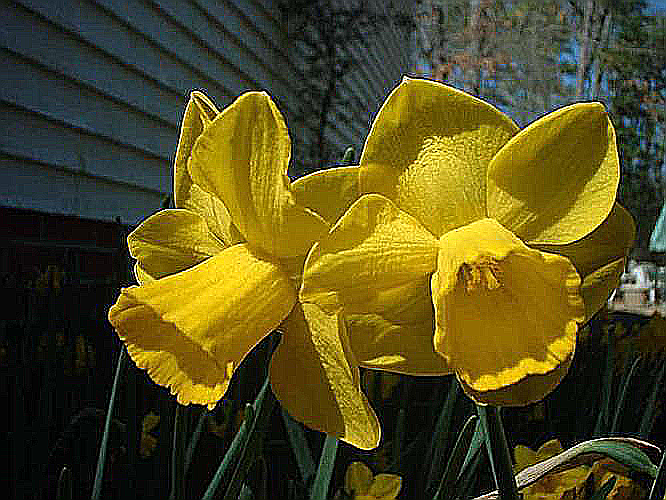

In [23]:
# To our second image i am trying EDGE_ENHANCE_MORE

from PIL.ImageFilter import EDGE_ENHANCE_MORE

Image.open('17flowers/jpg/0/image_0020.jpg').filter(ImageFilter.EDGE_ENHANCE_MORE)

# Applying FIND_EDGES filter

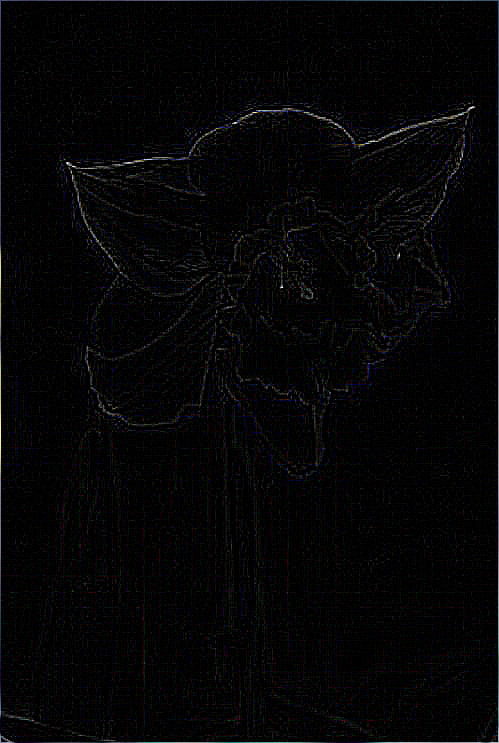

In [24]:
from PIL.ImageFilter import FIND_EDGES

Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.FIND_EDGES)

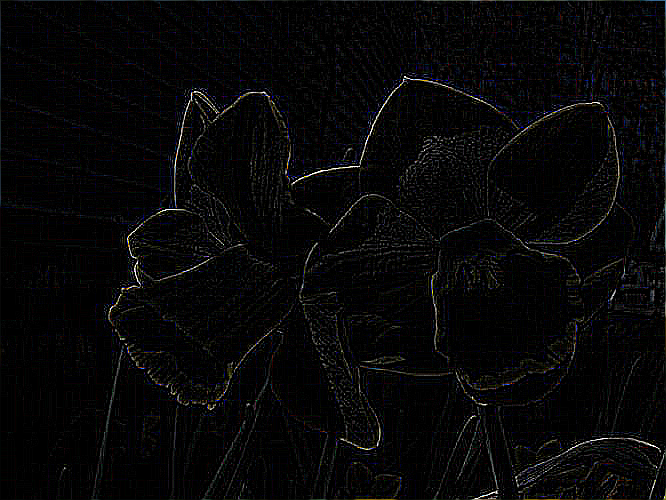

In [25]:
Image.open('17flowers/jpg/0/image_0020.jpg').filter(ImageFilter.FIND_EDGES)

# Applying SMOOTH and SMOOTH_MORE

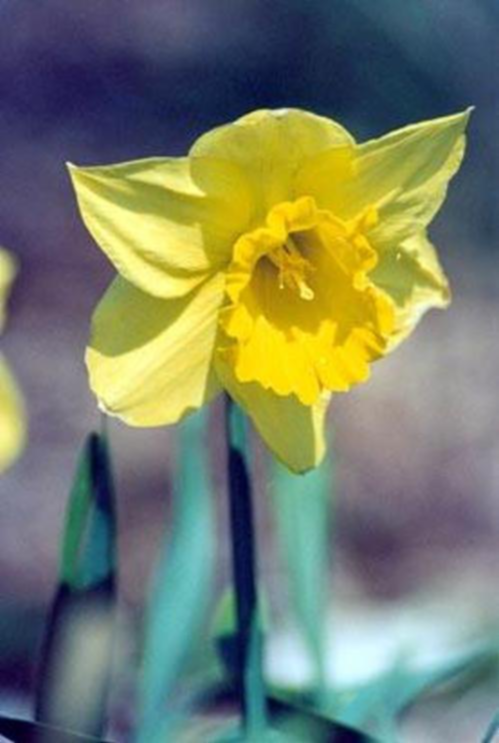

In [26]:
from PIL.ImageFilter import SMOOTH

Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.SMOOTH)

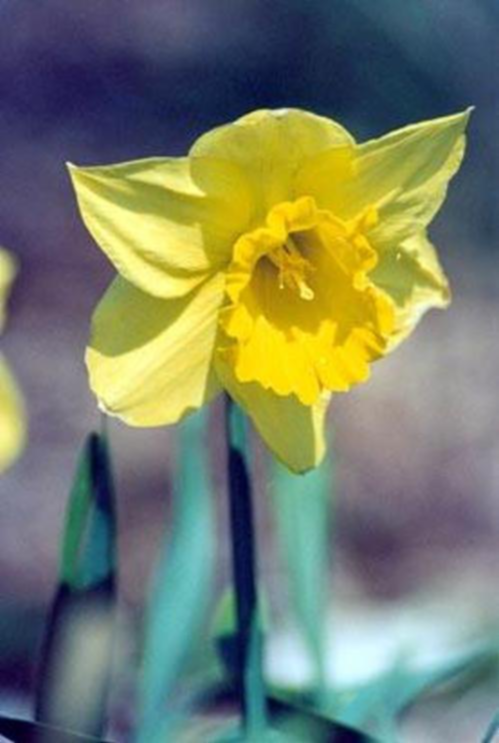

In [27]:
from PIL.ImageFilter import SMOOTH

Image.open('17flowers/jpg/0/image_0015.jpg').filter(ImageFilter.SMOOTH)

# Applying Logistic regression

In [ ]:

x=[]
X=[]
for i in os.listdir('17flowers/jpg'):
    for j in os.listdir('17flowers/jpg/'+i):
        a=cv2.imread('17flowers/jpg/'+i+'/'+j)
        a=cv2.resize(a,(224,224))
        X.append(a)
        a=n.reshape(a,(224,224,3))
        x.append(a)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(xtrain,ytrain)

ValueError: Found array with dim 4. Estimator expected <= 2.

# Building a neural network

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(np.asarray(X),np.asarray(y))
xtrain=xtrain.astype('float32')
xtrain/=255.0
xtest=xtest.astype('float32')
xtest/=255.0
import tensorflow.keras as k
from tensorflow.keras.utils import to_categorical
ytrain_c=to_categorical(ytrain)
ytest_c=to_categorical(ytest)

from tensorflow.keras.models import Sequential
m=Sequential([Flatten(),
              Dense(256,activation='relu'),
              Dense(64,activation='relu'),
              Dense(64,activation='relu'),
              Dense(32,activation='relu'),
              Dense(18,activation='softmax')])

from tensorflow.keras import optimizers
s=optimizers.Adam(learning_rate=1e-3)
m.compile(optimizer=s,loss='categorical_crossentropy',metrics=['accuracy'])
m.fit(xtrain,ytrain_c,validation_data=(xtest,ytest_c),epochs=100,batch_size=300)

Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - ETA: 0s - loss: 23.3471 - acc: 0.0569

C:\Users\dhiraj.gunasheela\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 23.3471 - acc: 0.0569 - val_loss: 22.1601 - val_acc: 0.1088
Epoch 2/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 20.1437 - acc: 0.0784 - val_loss: 14.4424 - val_acc: 0.0765
Epoch 3/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.5995 - acc: 0.0676 - val_loss: 8.4031 - val_acc: 0.0706
Epoch 4/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 6.4402 - acc: 0.0627 - val_loss: 5.6136 - val_acc: 0.0794
Epoch 5/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 4.6337 - acc: 0.0931 - val_loss: 3.2473 - val_acc: 0.0941
Epoch 6/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 3.3263 - acc: 0.0745 - val_loss: 2.9273 - val_acc: 0.0559
Epoch 7/100
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.8830 - acc: 0.1010 - val_loss: 2.7965 - val_acc: 0.1382
Epoch 8/100
1020/1020 [=========================

# Building a Convolutional neural network

In [ ]:
m=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=X[0].shape[0:]),
              MaxPooling2D(2,2),Conv2D(64,(5,5),activation='relu'),
              Flatten(),
              Dense(64,activation='relu'),
              Dense(18,activation='softmax')])

In [ ]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
m.fit(xtrain,ytrain_c,validation_data=(xtest,ytest_c),batch_size=32,epochs=30)

Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - ETA: 0s - loss: 5.0907 - acc: 0.0814

C:\Users\dhiraj.gunasheela\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 56s 55ms/sample - loss: 5.0907 - acc: 0.0814 - val_loss: 2.7342 - val_acc: 0.1029
Epoch 2/30
1020/1020 [==============================] - 57s 56ms/sample - loss: 2.1725 - acc: 0.3039 - val_loss: 2.1364 - val_acc: 0.2882
Epoch 3/30
1020/1020 [==============================] - 58s 57ms/sample - loss: 1.2838 - acc: 0.6069 - val_loss: 1.9543 - val_acc: 0.3853
Epoch 4/30
1020/1020 [==============================] - 58s 57ms/sample - loss: 0.5526 - acc: 0.8422 - val_loss: 2.2087 - val_acc: 0.3471
Epoch 5/30
1020/1020 [==============================] - 59s 57ms/sample - loss: 0.1750 - acc: 0.9598 - val_loss: 2.5473 - val_acc: 0.3853
Epoch 6/30
1020/1020 [==============================] - 58s 57ms/sample - loss: 0.0437 - acc: 0.9931 - val_loss: 2.6770 - val_acc: 0.3853
Epoch 7/30
1020/1020 [==============================] - 58s 57ms/sample - loss: 0.0287 - acc: 0.9971 - val_loss: 2.8903 - val_acc: 0.3824
Epoch 8/30
1020/1020 [=======================